### Labor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unem = pd.read_excel('../../Data/Labor/unemployment_rate.xlsx', index_col = 0) * 0.01
unem.index = pd.date_range(start = '2000-01-01', end='2023-11-01', freq='M')

In [3]:
unem

,unemployment_rate,경제활동인구,취업자
2000-01-31,0.057,214.42,202.10
2000-02-29,0.057,214.58,202.35
2000-03-31,0.051,218.10,206.96
2000-04-30,0.045,221.04,211.15
2000-05-31,0.041,223.37,214.20
...,...,...,...
2023-06-30,0.027,296.18,288.12
2023-07-31,0.027,294.93,286.86
2023-08-31,0.020,292.51,286.78
2023-09-30,0.023,293.59,286.98


In [25]:
inflation = pd.read_csv('../../Data/inflation.csv', index_col = 0)

In [26]:
inflation.index = pd.date_range(start = '1965-01-01', end='2023-11-01', freq='M')

In [27]:
inflation

,원데이터,전년동월 대비 증감률
1965-01-31,2.493,NaN
1965-02-28,2.548,NaN
1965-03-31,2.553,NaN
1965-04-30,2.593,NaN
1965-05-31,2.645,NaN
...,...,...
2023-06-30,111.120,2.7
2023-07-31,111.200,2.3
2023-08-31,112.330,3.4
2023-09-30,112.990,3.7


In [28]:
inflation = inflation.loc["2000":]['전년동월 대비 증감률'] * 0.01

In [50]:
unemploy_matrix = pd.concat([
    unem['unemployment_rate'],
    unem['  취업자'] / unem['경제활동인구'] ,
    unem['경제활동인구'].pct_change(12),
    unem['  취업자'].pct_change(12),
    inflation
], axis = 1).dropna()

In [51]:
unemploy_matrix.columns = ['unemployment_rate', 'employment_rate', 'eco_population', 'employment', 'inflation']

In [52]:
unemploy_matrix

,unemployment_rate,employment_rate,eco_population,employment,inflation
2001-01-31,0.051,0.949468,0.007835,0.015240,0.034
2001-02-28,0.055,0.945409,0.009041,0.011614,0.036
2001-03-31,0.051,0.948929,0.012701,0.012708,0.040
2001-04-30,0.041,0.959111,0.023435,0.027563,0.048
2001-05-31,0.037,0.963172,0.021131,0.025630,0.053
...,...,...,...,...,...
2023-06-30,0.027,0.972787,0.008581,0.011728,0.027
2023-07-31,0.027,0.972638,0.006209,0.007410,0.023
2023-08-31,0.020,0.980411,0.007786,0.009433,0.034
2023-09-30,0.023,0.977486,0.009143,0.010884,0.037


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = unemploy_matrix.iloc[:,1:]
y = unemploy_matrix['unemployment_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.6018325e-06


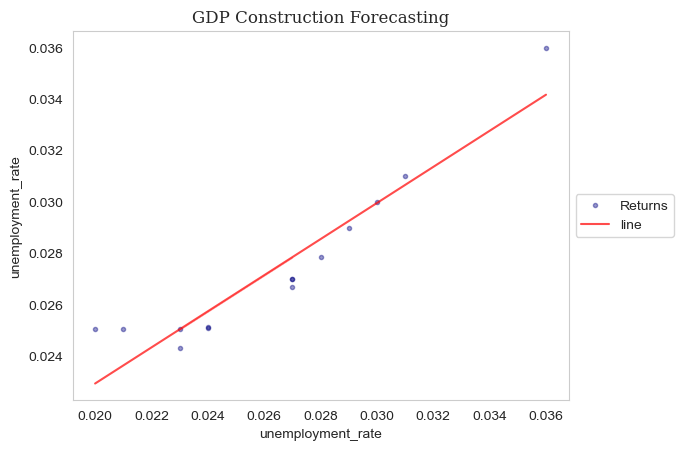

In [54]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Construction Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'GDP Construction Forecasting')

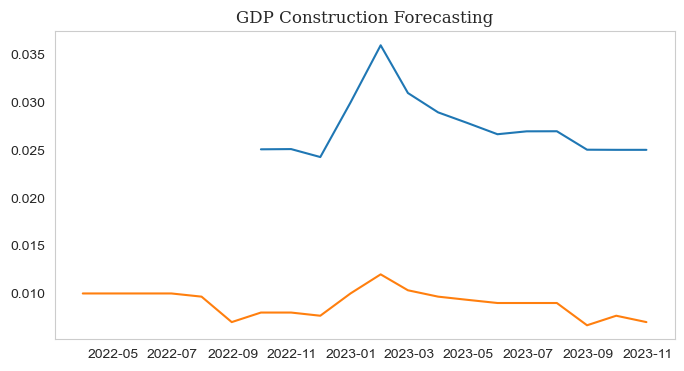

In [55]:
plt.figure(figsize = (8, 4))
plt.plot(pd.Series(y_pred, index = X_test.index))
plt.plot(unemploy_matrix['unemployment_rate'][-20:].dropna() / 3)
plt.grid(False)
plt.title('GDP Construction Forecasting', fontfamily = 'Serif')

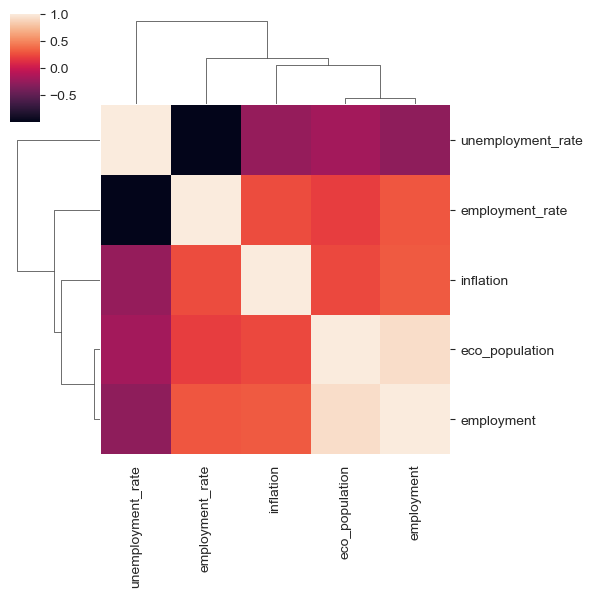

In [56]:
sns.clustermap(unemploy_matrix.corr(), figsize = (6, 6))

In [57]:
# unemploy_matrix.to_csv("../../Cleaned_Data/Labor.csv")